# Detailed Data Analysis: eatsmarter.de

### Table of contents:
1. Exploratory Analysis
    - General Statistics & Data Quality
    - (Users)
    - Recipes
    - Text Mining
        - Title Analysis
        - Ingredient Analysis
        - Feature Extraction
    - Dataset with Generated Features
2. (Trend Analysis)
3. Data Mining

# 1. Exploratory Analysis

## General Statistics & Data Quality

First, we do all necessary imports and convert the data from its list format to a pandas DataFrame for further operations.
Then, we show meta information about density/sparsity of each column.

### Import packages and data

In [5]:
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Read json file into a list
with open('data/eatsmarter_03.json') as data_file:    
    eatsmarter = json.load(data_file)

### Data structure

To understand the data structure that the scraper has exported, we can take a look at the first element from the list kochbar.
This is a dictionary that contains a single recipe.

In [7]:
eatsmarter[0]

{'avg_rating': '5',
 'calories': '403',
 'comment_number': '2',
 'difficulty': 'leicht',
 'images': 0,
 'ingredients': ['Quinoa',
  'Salz',
  'Olivenöl',
  'Mehl',
  'Weizen-Vollkornmehl',
  'Backpulver',
  'Eier',
  'Buttermilch',
  'Möhren',
  'Pastinaken',
  'Petersilienwurzeln',
  'Schalotten',
  'Champignons',
  'Currypulver',
  'Gemüsebrühe',
  'Sojacreme',
  'Pfeffer'],
 'name': 'Quinoa-Pfannkuchen',
 'prep_time': '1 h',
 'preparation': ' Quinoa in einem Sieb kalt abspülen, bis das Wasser klar bleibt, und abtropfen lassen. 110 ml Wasser zum Kochen bringen, Quinoa einstreuen und zugedeckt bei kleiner Hitze etwa 12 Minuten kochen. Den Topf vom Herd nehmen. Quinoa leicht salzen, mit 1 Spritzer Olivenöl beträufeln und etwas abkühlen lassen. Inzwischen beide Mehlsorten, Backpulver und 1 Prise Salz in einer großen Schüssel miteinander mischen. Eier, Buttermilch und 1 1/2 EL Olivenöl in einer weiteren Schüssel mit einem Schneebesen gut verrühren. Mit dem gekochten Quinoa zum Mehl geben

Thus, we can see that our dataset is a list of dictionaries, of which each is a single recipe. The dictionary itself consists of text fields that are all either filled with a string or None, if they are empty.

In [8]:
# The json is imported as a list of dictionaries filled with strings
type(eatsmarter), type(eatsmarter[0]), type(eatsmarter[0]['name'])

(list, dict, str)

In [9]:
eatdf = pd.DataFrame(eatsmarter)
eatdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151095 entries, 0 to 151094
Data columns (total 12 columns):
avg_rating        131818 non-null object
calories          39296 non-null object
comment_number    151095 non-null object
difficulty        151095 non-null object
images            151095 non-null int64
ingredients       151095 non-null object
name              151095 non-null object
prep_time         150952 non-null object
preparation       151095 non-null object
subtitle          151095 non-null object
total_time        70787 non-null object
total_votes       131818 non-null object
dtypes: int64(1), object(11)
memory usage: 13.8+ MB


The numeric fields need to be converted to their respective data format, so we can perform calculations with them, for example by summing or calculating the mean:

In [10]:
eatdf['avg_rating'] = pd.to_numeric(eatdf['avg_rating'])
eatdf['calories'] = pd.to_numeric(eatdf['calories'])
eatdf['comment_number'] = pd.to_numeric(eatdf['comment_number'])
eatdf['total_votes'] = pd.to_numeric(eatdf['total_votes'])

All recipes on eatsmarter.de are published by the website's editors, which is why we cannot count authors.

- How many recipes have been published on this platform?

In [11]:
len(eatdf['name'])

151095

- How many times have the users voted?

In [12]:
print(eatdf['total_votes'].sum())

14808.0


- Calculating deltas

For comparing the main statistics with older dataset versions, we will use the 1 month (eat1 / eat1df) and 6 months (eat6 / eat6df) older versions.

First, eat1:

In [13]:
with open('data/eatsmarter_02.json') as data_file:    
    eat1 = json.load(data_file)
eat1df = pd.DataFrame(eat1)
eat1df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200386 entries, 0 to 200385
Data columns (total 12 columns):
avg_rating        36254 non-null object
calories          51432 non-null object
comment_number    200386 non-null object
difficulty        200386 non-null object
images            200386 non-null int64
ingredients       200386 non-null object
name              200386 non-null object
prep_time         200154 non-null object
preparation       200386 non-null object
subtitle          200386 non-null object
total_time        90763 non-null object
total_votes       36254 non-null object
dtypes: int64(1), object(11)
memory usage: 18.3+ MB


In [14]:
# Number of recipes
print(len(eat1df['name']))
print(len(eatdf['name'])-len(eat1df['name']))

200386
-49291


In [15]:
# number of total votes
eat1df['total_votes'] = pd.to_numeric(eat1df['total_votes'])
print(eat1df['total_votes'].sum())
print(eatdf['total_votes'].sum()-eat1df['total_votes'].sum())

14565.0
243.0


Now we can do the same for eat6:

In [16]:
with open('data/eatsmarter_10.json') as data_file:    
    eat6 = json.load(data_file)    
eat6df = pd.DataFrame(eat6)
eat6df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200350 entries, 0 to 200349
Data columns (total 12 columns):
avg_rating        27827 non-null object
calories          51383 non-null object
comment_number    200350 non-null object
difficulty        200350 non-null object
images            200350 non-null int64
ingredients       200350 non-null object
name              200350 non-null object
prep_time         200118 non-null object
preparation       200350 non-null object
subtitle          200350 non-null object
total_time        90711 non-null object
total_votes       27827 non-null object
dtypes: int64(1), object(11)
memory usage: 18.3+ MB


In [17]:
# Number of recipes
print(len(eat6df['name']))
print(len(eatdf['name'])-len(eat6df['name']))

200350
-49255


In [18]:
# Number of total votes
eat6df['total_votes'] = pd.to_numeric(eat6df['total_votes'])
print(eat6df['total_votes'].sum())
print(eatdf['total_votes'].sum()-eat6df['total_votes'].sum())

13072.0
1736.0


#### Missing values
We can see that 5 out of 12 columns have missing values, which are the attributes connected to calories, recipe duration (prep_time and total_time) and ratings (avg_rating and total_votes).
Additionally, we can see that in October and February, the website had more than 200,000 recipes, growing very slowly by 36 recipes in 5 months, but in March the number has been reduced significantly to 151,095.

This means that either 25% of the website's recipes were deleted or the site's structure was changed, which lead to the scraper only being able to collect 75% of all recipes.

#### Dirty data
The attributes in the eatsmarter dataset are mostly clean, only the time values have a dirty format.

In [19]:
for r in eatsmarter[:10]:
    print(r['total_time'])

1 h 15 min
1 h 15 min
None
None
2 h
None
50 min
30 min
45 min
None


In [20]:
eatdf['total_time'].value_counts()[811:-1]

22 d. 1 h 20 min    1
3 d. 3 h 15 min     1
2 h 44 min          1
1 Tag 51 min        1
10 h 38 min         1
7 d. 15 min         1
1 Tag 3 h 55 min    1
2 d. 3 h 45 min     1
4 h 11 min          1
4 h 37 min          1
12 h 13 min         1
3 d. 1 h 10 min     1
2 d. 2 h 15 min     1
1 Tag 5 h 45 min    1
3 h 41 min          1
1 Tag 6 h 35 min    1
2 d. 55 min         1
12 h 14 min         1
21 d.               1
Name: total_time, dtype: int64

We can see that the format can have four different shapes: minutes, hours and minutes and days, hours and minutes with two different ways of writing the days (either "Tag" or "d.").
When cleaning this field, we need to consider these cases.

In [21]:
def clean_time(time):
    try:
        time = time.split(' ')
        minutes = 0
        for i,x in enumerate(time):
            if x == "Tag":
                minutes += int(time[i-1])*1440
            if x == "d.":
                minutes += int(time[i-1])*1440
            if x == "h":
                minutes += int(time[i-1])*60
            if x == "min":
                minutes += int(time[i-1])
        return minutes
    except AttributeError:
        return None
    except KeyError:
        return None

In [22]:
# Use prep_time, because it has fewer missing values
eatdf['minutes'] = eatdf['prep_time'].apply(clean_time)
eatdf.head(10)

,avg_rating,calories,comment_number,difficulty,images,ingredients,name,prep_time,preparation,subtitle,total_time,total_votes,minutes
0,5.0,403.0,2,leicht,0,"[Quinoa, Salz, Olivenöl, Mehl, Weizen-Vollkorn...",Quinoa-Pfannkuchen,1 h,"Quinoa in einem Sieb kalt abspülen, bis das W...",mit Gemüse-Pilz-Ragout,1 h 15 min,3.0,60.0
1,5.0,332.0,3,leicht,0,"[Lachsfilet, Sushi-Reis, Wasabi-Paste, Nori-Al...",Sushi-Torte,15 min,Eine Springform von 24 cm Ø mit Frischhaltefo...,mit Lachs und Nori-Algen,1 h 15 min,3.0,15.0
2,5.0,496.0,2,leicht,0,"[Kartoffeln, Steinpilze, Zwiebel, Schalotten, ...",Kartoffelplätzchen – smarter,50 min,Kartoffeln waschen und mit Schale zugedeckt c...,mit Steinpilzrahm,None,3.0,50.0
3,5.0,194.0,4,ganz einfach,0,"[Knoblauchzehe, Zwiebel, Bio-Zitrone, Olivenöl...",Frisches Erbsenpüree – smarter,15 min,Knoblauch und Zwiebel schälen und fein hacken...,mit Kresse und Zitrone,None,3.0,15.0
4,5.0,196.0,10,leicht,0,"[Pinienkerne, Haferflocken, Zimt, Salz, Honig,...",Hafer-Pinienkern-Crunchies,25 min,"Pinienkerne hacken, mit den Haferflocken in e...",mit getrockneten Kirschen,2 h,3.0,25.0
5,5.0,339.0,12,leicht,0,"[Schalotte, Rindertatar, Eigelbe, Dijonsenf, K...",Tatar-Frikadellen,30 min,Schalotte schälen und fein hacken. Eier trenn...,mit Tomaten-Oliven-Salat,None,3.0,30.0
6,5.0,172.0,4,leicht,1,"[Spargel, Salz, Zucker, Butter, Hollandaise]",Spargel – smarter,40 min,,klassisch zubereitet,50 min,3.0,40.0
7,5.0,NaN,0,leicht,1,"[Röhrennudel, Salz, Rucola, Kirschtomaten, Sch...",Nudel-Schinken-Salat mit Rucola und Tomaten,20 min,Die Nudeln in Salzwasser al dente kochen. Abg...,,30 min,4.0,20.0
8,5.0,NaN,1,leicht,1,"[Mais, Hackfleisch, Öl, Zwiebeln, Knoblauchzeh...",Hackfleisch-Mais-Auflauf mit Paprika,20 min,Den Backofen auf 200°C vorheizen. Eine Auflau...,,45 min,4.0,20.0
9,5.0,254.0,7,leicht,0,"[Quinoa, Gemüsebrühe, Tomaten, Zwiebel, Zucchi...",Gemüse-Quinoa,30 min,"Quinoa unter lauwarmem Wasser abspülen, bis e...",,None,9.0,30.0


In [23]:
# Images describes if the recipe has images in the preparation steps or not
eatdf['images'].value_counts()

0    91998
1    59097
Name: images, dtype: int64

In [24]:
# Export to Excel for use in Tableau or other programme
# (requires openpyxl and takes a few minutes)
writer = pd.ExcelWriter('exports/eatdf.xlsx')
eatdf.to_excel(writer,'Recipes')
writer.save()

## Users

As all recipes have been published by the editors of eatsmarter, which is why this analysis cannot be performed as in the other datasets.

## Recipes

### Overview

We can first take a look at the simple statistics:

- Which recipes have collected the most rating votes?

In [25]:
# Show top recipes according to votes
eatdf['total_votes'] = pd.to_numeric(eatdf['total_votes'])
votedf = pd.DataFrame(eatdf.sort_values(by='total_votes',ascending=False))
votedf.head(10)

,avg_rating,calories,comment_number,difficulty,images,ingredients,name,prep_time,preparation,subtitle,total_time,total_votes,minutes
148958,4.5,416.0,61,leicht,0,"[Kohlrabi, Möhren, Paprikaschote, Zwiebeln, Kn...",Gemüse-Reis-Pfanne aus dem Ofen,45 min,"Kohlrabi und Möhren waschen, putzen, schälen ...","mit Kohlrabi, Paprika und Möhren",1 h,51.0,45.0
1593,4.4,354.0,56,leicht,0,"[Brokkoli, Paprikaschote, Möhre, Knoblauchzehe...",Couscous-Gemüse-Pfanne,30 min,Brokkoli waschen und putzen. Den dicken Stiel...,mit Harissa,None,47.0,30.0
148781,4.4,386.0,25,leicht,0,"[Zucchini, Gnocchi, Salz, Kirschtomaten, Peter...",Gnocchi-Zucchini-Pfanne,10 min,"Zucchini waschen, putzen und auf einem Gemüse...",mit Kirschtomaten und Parmesan,None,45.0,10.0
1454,4.6,590.0,26,ganz einfach,0,"[getrocknete Tomaten, Knoblauchzehe, Basilikum...",Ziegenkäse-Pasta,15 min,Die Tomaten in einem Sieb abtropfen lassen un...,mit getrockneten Tomaten,None,43.0,15.0
1430,4.7,358.0,41,leicht,0,"[Salatgurke, rote Zwiebel, Lachsfilet, Rapsöl,...",Lachs-Gurken-Pfanne,20 min,"Salatgurke waschen, schälen und halbieren. Mi...",mit Dill und Anislikör,None,38.0,20.0
1638,4.3,399.0,36,leicht,0,"[Putenbrustfilet, Paprikaschoten, Zwiebeln, Kn...",Serbisches Reisfleisch,45 min,"Putenbrust abspülen, trockentupfen und in 2 c...","mit Pute, Paprika und Tomaten",None,36.0,45.0
148716,4.3,320.0,28,leicht,0,"[Pfeffer, Schalotten, Knoblauchzehen, Schnittl...",Puten-Pfeffersteak – smarter,20 min,Grünen Pfeffer in einem Sieb abtropfen lassen...,in feiner Rahmsauce,None,35.0,20.0
1639,4.3,386.0,17,leicht,0,"[Kartoffeln, Salz, rote Zwiebel, Kirschtomaten...",Kartoffelpfanne,40 min,Kartoffeln gründlich waschen und in kochendem...,mit Garnelen und Sauerampfer,1 h 15 min,32.0,40.0
148753,4.3,415.0,22,leicht,0,"[Putenbrustfilet, Paprikaschote, Möhren, rote ...",Süßsaures Putenfleisch,40 min,,mit Gemüse aus dem Wok,None,32.0,40.0
1640,4.3,323.0,21,leicht,0,"[Auberginen, Salz, Pfeffer, Parmesankäse, Basi...",Auberginen-Auflauf,30 min,"Auberginen waschen, trockenreiben und in 1,5 ...","mit Tomaten, Parmesan und Mozzarella",1 h 10 min,32.0,30.0


We could do the same for:

- Which recipes have the highest rating?

In [26]:
# Another example for sorting:
votedf.sort_values(by=['avg_rating'],ascending=[False]).head(10)

,avg_rating,calories,comment_number,difficulty,images,ingredients,name,prep_time,preparation,subtitle,total_time,total_votes,minutes
149404,5.0,NaN,0,leicht,1,"[Eier, Mehl, Zucker, Milch, Äpfel, Calvados, S...",Mit Äpfeln gefüllte Pfannkuchen,1 h 45 min,"Eier, 40 g Zucker und Mehl mit einem Schneebe...",,None,1.0,105.0
150117,5.0,NaN,0,mittel,1,"[Lammhack, Petersilie, Knoblauchzehe, Zitronen...",Gebackene Lammfleischbällchen mit Tomaten und ...,40 min,Den Knoblauch schälen und fein hacken. Dann d...,,1 h 10 min,1.0,40.0
150083,5.0,NaN,0,leicht,1,"[Mehl, Eier, Salz, Schalotte, Butter, Kalbsbrä...","Nudeltaschen mit Füllung aus Brät, Speck und S...",30 min,Für den Nudelteig das Mehl auf die Arbeitsflä...,,1 h 10 min,1.0,30.0
150082,5.0,NaN,0,leicht,1,"[Hähnchenkeulen, Zucchini, Paprikaschoten, Pap...",Gebratene Hähnchenkeulen mit Gemüse,30 min,Den Backofen auf 180°C Unter- und Oberhitze v...,,1 h 10 min,1.0,30.0
150081,5.0,NaN,0,leicht,1,"[Linsen, Fenchelsaat, Gemüsebrühe, Kohlrabi, K...",Lachsforellenfilets mit Kohlrabi-Linsen und Bi...,45 min,Die Linsen mit den Fenchelsamen und 600 ml Ge...,,None,1.0,45.0
150080,5.0,NaN,0,leicht,1,"[Möhren, Zuckerschoten, Peperoni, Glasnudeln, ...",Glasnudeln-Karotten-Pfanne aus dem Wok,20 min,Für die Zuckerschoten in einem Topf Wasser zu...,,35 min,1.0,20.0
150099,5.0,NaN,0,leicht,0,"[Kartoffeln, Salz, Wirsing, Eier, Kartoffelstä...",Wirsing-Frikadellen,45 min,Die Kartoffeln waschen und in Salzwasser ca. ...,,1 h 25 min,1.0,45.0
150079,5.0,NaN,2,leicht,1,"[Muskat-Kürbis, Tomaten, Schalotten, Ingwer, C...",Scharfes Kürbis-Chutney,25 min,Den Kürbis in kleine Würfel schneiden. Die To...,,50 min,1.0,25.0
150100,5.0,NaN,0,leicht,0,"[Pinienkerne, Sardellenfilets, Oliven, Petersi...",Olivencreme,15 min,Die Pinienkerne in einer Pfanne ohne Fett anr...,,None,1.0,15.0
150102,5.0,NaN,0,leicht,1,"[Riesenbohnen, Gemüsebrühe, Zwiebeln, Knoblauc...",Große Bohnen mit Tomatensugo,25 min,Die Bohnen über Nacht einweichen. Abgießen un...,,13 h 55 min,1.0,25.0


- Which recipes have been discussed the most? (highest comment number)

In [27]:
# Show top 10 most discussed recipes
votedf.sort_values(by='comment_number',ascending=False).head(10)

,avg_rating,calories,comment_number,difficulty,images,ingredients,name,prep_time,preparation,subtitle,total_time,total_votes,minutes
148958,4.5,416.0,61,leicht,0,"[Kohlrabi, Möhren, Paprikaschote, Zwiebeln, Kn...",Gemüse-Reis-Pfanne aus dem Ofen,45 min,"Kohlrabi und Möhren waschen, putzen, schälen ...","mit Kohlrabi, Paprika und Möhren",1 h,51.0,45.0
1593,4.4,354.0,56,leicht,0,"[Brokkoli, Paprikaschote, Möhre, Knoblauchzehe...",Couscous-Gemüse-Pfanne,30 min,Brokkoli waschen und putzen. Den dicken Stiel...,mit Harissa,None,47.0,30.0
1729,4.2,114.0,56,leicht,0,"[Eier, Salz, Zucker, Vanilleschote, Apfelmus, ...",Apfel-Brownies,15 min,Die Eier trennen. Eiweiße in ein hohes Gefäß ...,mit Vanille,40 min,26.0,15.0
1732,4.2,427.0,48,leicht,0,"[Suppengrün, Schalotten, Knoblauchzehen, Thymi...",Geschmortes Hähnchen in Rotwein,40 min,"Suppengrün putzen, waschen und in Stücke schn...","mit Schalotten, Champignons und Kräutern",1 h 20 min,25.0,40.0
148722,4.3,285.0,42,leicht,0,"[Frühlingszwiebeln, Knoblauchzehen, Olivenöl, ...",Tomatenauflauf,15 min,"Frühlingszwiebeln putzen, waschen und in 1 cm...",mit Ricottacreme,45 min,23.0,15.0
148664,4.1,119.0,41,leicht,0,"[Butter, Quark, Ei, Salz, Dinkel-Vollkornmehl,...",Sesam-Quark-Brötchen,40 min,Butter in einem Topf schmelzen und abkühlen l...,aus Dinkelmehl,1 h 10 min,8.0,40.0
1430,4.7,358.0,41,leicht,0,"[Salatgurke, rote Zwiebel, Lachsfilet, Rapsöl,...",Lachs-Gurken-Pfanne,20 min,"Salatgurke waschen, schälen und halbieren. Mi...",mit Dill und Anislikör,None,38.0,20.0
1691,4.3,184.0,40,anspruchsvoll,0,"[Paprikaschote, Zwiebel, Knoblauchzehen, Olive...",Auberginen-Cannelloni,45 min,"Paprikaschote vierteln, entkernen, waschen un...",mit Ziegenfrischkäse,1 h,20.0,45.0
1592,4.4,225.0,38,mittel,0,"[Joghurtbutter, Zucker, Vanillezucker, Vanille...",Bananenkuchen,25 min,"Joghurtbutter, 60 g Zucker und den Vanillezuc...",mit Quark und Haferflocken,2 h,13.0,25.0
1718,4.2,237.0,37,leicht,0,"[Fleischtomaten, Petersilie, Schalotte, Hähnch...",Schnelle Hähnchenschnitzel,15 min,"Die Tomaten waschen, halbieren und die Kerne ...",mit gerösteten Tomaten und Marsala,None,25.0,15.0


### Exploration

We can take a look at the recipe difficulties:

In [28]:
# How many recipes of each difficulty level are available?
eatdf['difficulty'].value_counts()

leicht           79028
mittel           55368
anspruchsvoll    13385
ganz einfach      3153
für Profis         161
Name: difficulty, dtype: int64

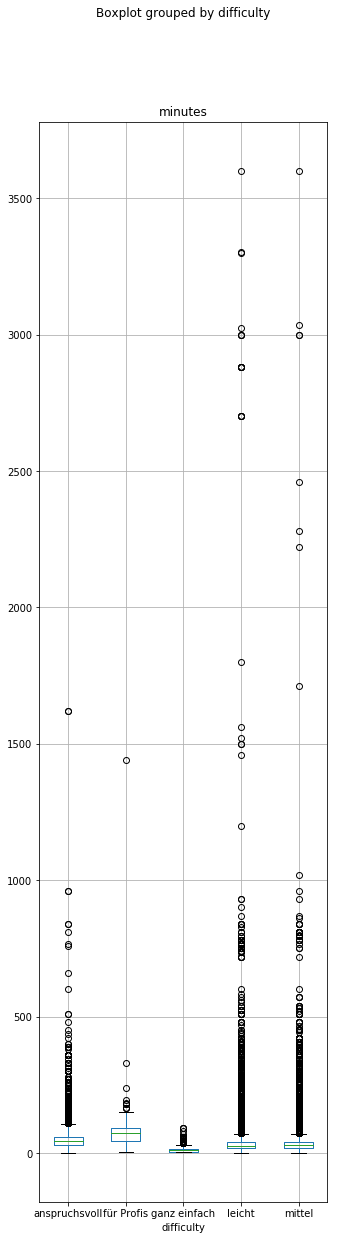

In [29]:
# Show boxplots for recipe duration (time_mins) w.r.t. recipe difficulty 
# (leicht = easy, mittel = medium, schwer = difficult)
eatdf = eatdf.loc[eatdf['minutes'] < 4000]
eatdf.boxplot(column='minutes', by = 'difficulty', figsize=(5,20))

It is obvious that these values do not have a normal or even symmetric distribution, but rather an exponential one, as we have seen above as well. Due to that reason, boxplots only provide limited insight in our case.

However, if we still interpret this plot, we can see that the average duration of recipes increase together with their difficulty. For easy recipes, we can see more outliers (outside the whisker) as there are more data points in this category.

We can create one DataFrame only for the numeric data in the recipes and calculate correlations:

### Correlations

We need to create a DataFrame with numerical attributes only, which we can then use to build a scatter matrix to see how these features that we have just created are distributed. Additionally, we drop calories, because the attribute only has 39k out of 151k data points filled with a value.

In [30]:
numerics = pd.DataFrame(eatdf)
columns = ['calories', 'difficulty', 'ingredients', 'name', 'prep_time', 'preparation', 'subtitle', 'total_time']
numerics = numerics.drop(columns, axis=1)
numerics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150948 entries, 0 to 151094
Data columns (total 5 columns):
avg_rating        131671 non-null float64
comment_number    150948 non-null int64
images            150948 non-null int64
total_votes       131671 non-null float64
minutes           150948 non-null float64
dtypes: float64(3), int64(2)
memory usage: 6.9 MB


In [31]:
import math
def fill_zeros(x):
    if x == None:
        x = 1
    if math.isnan(x):
        x = 1
    if x == 0:
        x = 1
    return x

In [32]:
# Fill missing values and zeros with 1
numerics['avg_rating'] = numerics['avg_rating'].apply(fill_zeros)
numerics['total_votes'] = numerics['total_votes'].apply(fill_zeros)
numerics['minutes'] = numerics['minutes'].apply(fill_zeros)
numerics['comment_number'] = numerics['comment_number'].apply(fill_zeros)
numerics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150948 entries, 0 to 151094
Data columns (total 5 columns):
avg_rating        150948 non-null float64
comment_number    150948 non-null int64
images            150948 non-null int64
total_votes       150948 non-null float64
minutes           150948 non-null float64
dtypes: float64(3), int64(2)
memory usage: 6.9 MB


In [33]:
numerics.describe()

,avg_rating,comment_number,images,total_votes,minutes
count,150948.000000,150948.000000,150948.000000,150948.000000,150948.000000
mean,1.164963,1.086613,0.391486,1.048301,38.115059
std,0.745578,0.928944,0.488084,0.668747,55.534081
min,1.000000,1.000000,0.000000,1.000000,1.000000
25%,1.000000,1.000000,0.000000,1.000000,20.000000
50%,1.000000,1.000000,0.000000,1.000000,30.000000
75%,1.000000,1.000000,1.000000,1.000000,40.000000
max,5.000000,61.000000,1.000000,51.000000,3600.000000


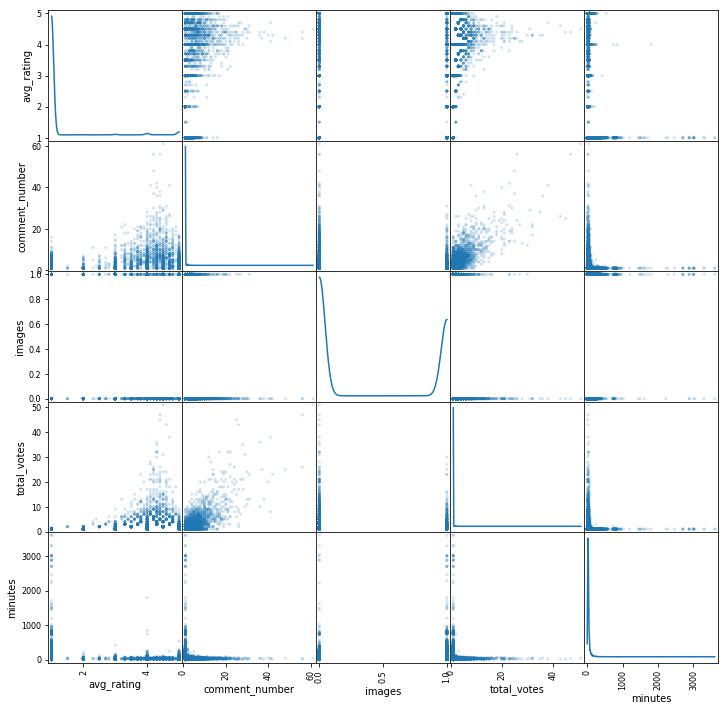

In [34]:
from pandas.plotting import scatter_matrix
_ = scatter_matrix(numerics, alpha=0.2, figsize=(12, 12), diagonal='kde')

The scatter matrix shows pairwise distributions and provides information about each attribute's distribution. The diagonal of the matrix shows the Kernel Density Estimates, which are estimates for each attribute's probability density. This can be used to identify the distribution of each attribute. We can see that actually all attributes have a more or less exponential distribution.

To analyse the dependencies in more detail, we can use a correlation coefficient to measure linear dependency between two attributes. The package scipy provides multiple functions for this purpose. We can start by using the Pearson's r, which is the most commonly used correlation coefficient:

In [35]:
# Compute all Pearson r's and their p-Value, which are then stored in lists:
from scipy.stats.stats import pearsonr

def calculate_pearson(df):
    pear = []
    pearp = []
    for i in df:
        pear_i = []
        pearp_i = []
        for j in df:
            pear_i.append(pearsonr(df[i], df[j])[0])
            pearp_i.append(pearsonr(df[i], df[j])[1])
        pear.append(pear_i)
        pearp.append(pearp_i)
    return pear, pearp

In [36]:
pear, pearp = calculate_pearson(numerics)
peardf = pd.DataFrame(pear, columns=numerics.columns, index=numerics.columns)
peardf

,avg_rating,comment_number,images,total_votes,minutes
avg_rating,1.000000,0.319862,0.013169,0.299388,-0.014703
comment_number,0.319862,1.000000,-0.038812,0.778475,-0.008783
images,0.013169,-0.038812,1.000000,-0.030390,0.142453
total_votes,0.299388,0.778475,-0.030390,1.000000,-0.009634
minutes,-0.014703,-0.008783,0.142453,-0.009634,1.000000


In [37]:
pearpdf = pd.DataFrame(pearp, columns=numerics.columns, index=numerics.columns)
pearpdf

,avg_rating,comment_number,images,total_votes,minutes
avg_rating,0.000000e+00,0.000000e+00,3.114035e-07,0.000000e+00,1.110879e-08
comment_number,0.000000e+00,0.000000e+00,2.038592e-51,0.000000e+00,6.441974e-04
images,3.114035e-07,2.038592e-51,0.000000e+00,3.471124e-32,0.000000e+00
total_votes,0.000000e+00,0.000000e+00,3.471124e-32,0.000000e+00,1.819124e-04
minutes,1.110879e-08,6.441974e-04,0.000000e+00,1.819124e-04,0.000000e+00


Pearson's r would not work for most of the columns, because they have missing values, which are filled with None.
On the manually adapted dataset we need to consider this when analysing the results.

Thus, we should calculate a different correlation coefficient: The Spearman's rho, which is a rank correlation coefficient, does measure how well the relationship between two attributes can be described with a monotonic function. This includes linear functions, but is not limited to them. 
(An alternative option to this would be Kendall's tau, which operates in a similar way.)

In [38]:
from scipy.stats.stats import spearmanr
speardf = pd.DataFrame(spearmanr(numerics)[0], columns=numerics.columns, index=numerics.columns)
speardf

,avg_rating,comment_number,images,total_votes,minutes
avg_rating,1.000000,0.394201,0.012864,0.520544,0.013443
comment_number,0.394201,1.000000,-0.035198,0.527530,0.018156
images,0.012864,-0.035198,1.000000,-0.033113,0.221507
total_votes,0.520544,0.527530,-0.033113,1.000000,0.003945
minutes,0.013443,0.018156,0.221507,0.003945,1.000000


In [39]:
from scipy.stats.stats import spearmanr
spearpdf = pd.DataFrame(spearmanr(numerics)[1], columns=numerics.columns, index=numerics.columns)
spearpdf

,avg_rating,comment_number,images,total_votes,minutes
avg_rating,0.000000e+00,0.000000e+00,5.793381e-07,0.000000e+00,1.761072e-07
comment_number,0.000000e+00,0.000000e+00,1.351519e-42,0.000000e+00,1.731701e-12
images,5.793381e-07,1.351519e-42,0.000000e+00,6.763616e-38,0.000000e+00
total_votes,0.000000e+00,0.000000e+00,6.763616e-38,0.000000e+00,1.253855e-01
minutes,1.761072e-07,1.731701e-12,0.000000e+00,1.253855e-01,0.000000e+00


Spearman's rho only shows a single relevant dependency in the original data: a very high pairwise correlation of avg_rating and total_votes, which means that the more people vote for a recipe, the higher the average rating gets.
Also, the existence of images in the preparation steps does not seem to influence the number of votes or the recipe's rating in any way.

However, in the manually adapted dataset (seen above) we cannot find any strong pairwise correlations between the attributes.

### Logarithmic transformation

Transforming the attributes is only possible, if we use the manually adapted dataset without missing values or zeros. However, as we can see in the kernel density estimates, the distributions of these attributes are extremely skewed.
This is due to the fact that only a few recipes actually have ratings or comments, while the vast majority has neither.
This shows how inactive the user community is on this website in comparison to kochbar or chefkoch.

Due to these properties of the underlying dataset, further analysis of transformation does not make any sense.
Still, the code is provided in the comments below for experimentation.

In [40]:
# Looking at the histograms in a single graph
#numerics["avg_rating"].hist(bins=25, alpha=0.5, label="avg_rating")  # blue
#numerics["calories"].hist(bins=25, alpha=0.5, label="calories")  # orange/yellow
#numerics["comment_number"].hist(bins=25, alpha=0.5, label="comment_number")  # green
#plt.legend()
#plt.show()

In [41]:
# How do the histograms look if we log transform all attributes?
#import numpy as np
#users_transformed = pd.DataFrame(numerics)
#users_transformed["avg_rating"].apply(np.log).hist(bins=25, alpha=0.5, label="avg_rating")  # still exponential
#users_transformed["calories"].apply(np.log).hist(bins=25, alpha=0.5, label="calories")  
#users_transformed["comment_number"].apply(np.log).hist(bins=25, alpha=0.5, label="comment_number") 
#plt.legend()
#plt.show()

In [42]:
#numerics['total_votes'].hist(bins=25, alpha=0.5, label="total_votes")
#numerics['minutes'].hist(bins=25, alpha=0.5, label="minutes")
#plt.legend()
#plt.show()

In [43]:
#users_transformed = pd.DataFrame(numerics)
#users_transformed['number_votes'].apply(np.log).hist(bins=25, alpha=0.5, label="number_votes")  
#users_transformed['favorites'].apply(np.log).hist(bins=25, alpha=0.5, label="favorites")  
#users_transformed['votes_per_recipe'].apply(np.log).hist(bins=25, alpha=0.5, label="votes_per_recipe")  
#users_transformed['votes_per_recipe'].apply(np.log).hist(bins=25, alpha=0.5, label="votes_per_recipe") 
#plt.legend()
#plt.show()

### Title analysis

What can we learn from the recipe titles? We can either use the titles as they are (which does not provide very valuable results) or split the titles up into single words and perform further steps like word count or generating new features.
For this, the data has to be cleaned further.

In [44]:
eatdf.head(5)

,avg_rating,calories,comment_number,difficulty,images,ingredients,name,prep_time,preparation,subtitle,total_time,total_votes,minutes
0,5.0,403.0,2,leicht,0,"[Quinoa, Salz, Olivenöl, Mehl, Weizen-Vollkorn...",Quinoa-Pfannkuchen,1 h,"Quinoa in einem Sieb kalt abspülen, bis das W...",mit Gemüse-Pilz-Ragout,1 h 15 min,3.0,60.0
1,5.0,332.0,3,leicht,0,"[Lachsfilet, Sushi-Reis, Wasabi-Paste, Nori-Al...",Sushi-Torte,15 min,Eine Springform von 24 cm Ø mit Frischhaltefo...,mit Lachs und Nori-Algen,1 h 15 min,3.0,15.0
2,5.0,496.0,2,leicht,0,"[Kartoffeln, Steinpilze, Zwiebel, Schalotten, ...",Kartoffelplätzchen – smarter,50 min,Kartoffeln waschen und mit Schale zugedeckt c...,mit Steinpilzrahm,None,3.0,50.0
3,5.0,194.0,4,ganz einfach,0,"[Knoblauchzehe, Zwiebel, Bio-Zitrone, Olivenöl...",Frisches Erbsenpüree – smarter,15 min,Knoblauch und Zwiebel schälen und fein hacken...,mit Kresse und Zitrone,None,3.0,15.0
4,5.0,196.0,10,leicht,0,"[Pinienkerne, Haferflocken, Zimt, Salz, Honig,...",Hafer-Pinienkern-Crunchies,25 min,"Pinienkerne hacken, mit den Haferflocken in e...",mit getrockneten Kirschen,2 h,3.0,25.0


In [45]:
# Show most common recipe names (Single-word titles)
eatdf['name'].value_counts().head(10) 

Kartoffelsalat      124
Gefüllte Tomaten    121
Gazpacho            101
Gemüsesuppe          96
Minestrone           94
Nudelsalat           81
Käsekuchen           81
Kartoffelsuppe       76
Tomatensauce         75
Ratatouille          73
Name: name, dtype: int64

It is interesting that even on eatsmarter.de, where all recipes are published by one editorial team, there are still so many duplicate recipe names. Again, we need to split up multi-word titles and count all words seperately to find interesting results.

While doing this, we also need to clean out characters/symbols and stopwords that do not help in identifying the recipe's content. This will be shown in the next steps:

In [46]:
# Creates a list of single words from a list of multi-word names, removing most-common symbols
nameslist = []
for x in range(len(eatdf)):
    words = eatdf.iloc[x]['name']
    # filter unnecessary characters
    for char in ['"','-','=','!','(',')','.','♥',',',':','~','„','“','/','–','&','+',';','*','☆']:
        words = words.replace(char, ' ')
    words = words.split(' ',20)  # Split up titles with up to 20 whitespaces
    nameslist.extend(words)
    
# Remove empty elements, which occur when there is a space or symbol at the end of a name
nameslist = list(filter(None, nameslist))  
nameslist[:10]

['Quinoa',
 'Pfannkuchen',
 'Sushi',
 'Torte',
 'Kartoffelplätzchen',
 'smarter',
 'Frisches',
 'Erbsenpüree',
 'smarter',
 'Hafer']

In [47]:
# list of german stop words from: https://www.ranks.nl/stopwords/german
# for removing words like "and", "or", etc.
text_file = open("data/stopwords.txt", "r", encoding = "ISO-8859-1")
stopwords  = text_file.readlines()
for i in range(len(stopwords)):
    stopwords[i] = stopwords[i].replace('\n','')

In [48]:
# filter unnecessary stopwords from nameslist
for stop in stopwords:
    nameslist = list(filter(lambda k: stop != k, nameslist))
    
nameslist[:10]

['Quinoa',
 'Pfannkuchen',
 'Sushi',
 'Torte',
 'Kartoffelplätzchen',
 'smarter',
 'Frisches',
 'Erbsenpüree',
 'smarter',
 'Hafer']

In [49]:
# Now, we can filter all list entries that contain numbers, so there are only words left.
# For that, we first need to define a function that can detect numbers in a string:
import re
def containsNumbers(string):
    return bool(re.search(r'\d', string))

In [50]:
# Now we can filter nameslist with the new function:
nameslist = [w for w in nameslist if not containsNumbers(w)]    

In [51]:
# Now we can count the words in nameslist:
from collections import Counter
namecount = Counter(nameslist)
namecount.most_common(10)

[('Gemüse', 4732),
 ('Salat', 4499),
 ('Tomaten', 3534),
 ('Art', 2573),
 ('Gefüllte', 2030),
 ('Käse', 1814),
 ('Hähnchen', 1797),
 ('Spargel', 1690),
 ('Apfel', 1670),
 ('Nudeln', 1638)]

In [52]:
# This still contains french and italian stop words (e.g. "á", "la", "alla"), as such words are often used in recipe titles.
# Additionally, there are still some German stopwords which have not been filtered before because they contain capital letters
# The following list has been extracted manually from the 1000 most frequent words (kochbar)
more_stopwords = ('Art', 'a', 'la', 'de', 'á', 'à', 'ohne', 'mal', 'lecker', 'Mein', 'dazu', 
                  'ala', 'au', 'alla', 'ganz', 'schnelle', 'al', 'di', 'Die', 'Der', 'Das', 
                  'MIT', 'Mit', 'a’la', 'Ein', 'so', 'u', 'e', 'E', 'nur', 'D', 'A', 'Co', 
                  'I', 'um', 'ihn', 'and', 'Aus', 'II', 'Nr', 'Style', 'gut', 'ca', 'UND', 
                  'con', 'smarter')

for stop in more_stopwords:
    nameslist = list(filter(lambda k: stop != k, nameslist))

In [53]:
# Count the words in nameslist, creates a dictionary with word counts
from collections import Counter
counts = Counter(nameslist)
counts.most_common(10)

[('Gemüse', 4732),
 ('Salat', 4499),
 ('Tomaten', 3534),
 ('Gefüllte', 2030),
 ('Käse', 1814),
 ('Hähnchen', 1797),
 ('Spargel', 1690),
 ('Apfel', 1670),
 ('Nudeln', 1638),
 ('Sauce', 1542)]

In [54]:
# The counter can also be converted into a pandas DataFrame.
# (This provides a higher functionality than the limited Counter object.)
countsdf = pd.Series(dict(counts), name='count')
countsdf = countsdf.reset_index().sort_values(by='count', ascending=False)
countsdf.columns = ['word', 'count']
countsdf.index = countsdf['word']
countsdf = countsdf.drop('word', axis=1)

# Add log transfored counts:
import numpy as np
countsdf['log_count'] = countsdf['count'].apply(np.log)
countsdf.head(10)

,count,log_count
word,,
Gemüse,4732,8.462103
Salat,4499,8.411610
Tomaten,3534,8.170186
Gefüllte,2030,7.615791
Käse,1814,7.503290
Hähnchen,1797,7.493874
Spargel,1690,7.432484
Apfel,1670,7.420579
Nudeln,1638,7.401231


In [55]:
# Statistics for word counts
countsdf.describe()

,count,log_count
count,35120.000000,35120.000000
mean,9.968736,0.758103
std,67.694892,1.190533
min,1.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,3.000000,1.098612
max,4732.000000,8.462103


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f29abad42b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f29ab8a9208>]], dtype=object)

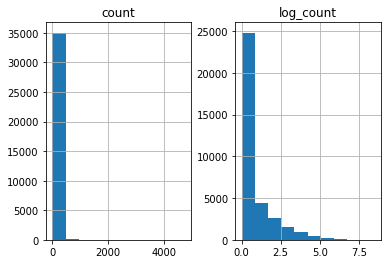

In [56]:
countsdf.hist()

In [57]:
i = 0
for w in counts.most_common(100000):
    i += 1
    if w[1] == 99:
        print(w)
        print(i)
        break

('Vegetarische', 99)
588


The first 588 words occur at least 100 times in the data set.

In [58]:
countsdf[:587].describe()

,count,log_count
count,587.000000,587.000000
mean,328.385009,5.469206
std,406.073521,0.712747
min,100.000000,4.605170
25%,135.500000,4.908965
50%,194.000000,5.267858
75%,364.000000,5.897150
max,4732.000000,8.462103


#### Generating new features from recipe titles
##### How can we split up the titles in the DataFrame?
This can be done using the techniques shown above:

In [59]:
# Creating a new data frame, because the features will be high-dimensional
namedf = pd.DataFrame()
namedf['name'] = eatdf['name']
namedf.index = eatdf.index

namedf.head(10)

,name
0,Quinoa-Pfannkuchen
1,Sushi-Torte
2,Kartoffelplätzchen – smarter
3,Frisches Erbsenpüree – smarter
4,Hafer-Pinienkern-Crunchies
5,Tatar-Frikadellen
6,Spargel – smarter
7,Nudel-Schinken-Salat mit Rucola und Tomaten
8,Hackfleisch-Mais-Auflauf mit Paprika
9,Gemüse-Quinoa


In [60]:
namelist = []
for w in namedf['name']:
    for char in ['"','-','=','!','(',')','.','♥',',',':','~','„','“','/','–','&','+',';','*','☆']:
        if char in w:
            w = w.replace(char,' ')
    namelist.append(w)

In [61]:
tmplist = []

for title in namelist:
    
    title = title.split(' ')
    
    # Filter empty list entries
    title = list(filter(None, title)) 
    
    # Filter all stop words defined above
    for stop in stopwords:
        title = list(filter(lambda k: stop != k, title))
    for stop in more_stopwords:
        title = list(filter(lambda k: stop != k, title))
    
    # Remove numbers from titles
    title = [w for w in title if not containsNumbers(w)] 
    
    tmplist.append(title)

In [62]:
namedf['name'] = tmplist
# namedf.head(10)

In [63]:
tmplist2 = []

for l in tmplist:
    for w in l:
        tmplist2.append(w)

from collections import Counter
count = Counter(tmplist2)
titlewords = count.most_common(100)
titlewords[:10]

[('Gemüse', 4732),
 ('Salat', 4499),
 ('Tomaten', 3534),
 ('Gefüllte', 2030),
 ('Käse', 1814),
 ('Hähnchen', 1797),
 ('Spargel', 1690),
 ('Apfel', 1670),
 ('Nudeln', 1638),
 ('Sauce', 1542)]

In [64]:
count['Kuchen']

911

In [65]:
# From each title, pick the two most common words to generate two new columns

toplist1 = []
toplist2 = []

for title in namedf['name']:
    try:
        topword1 = title[0]
        topword2 = title[1]
    except IndexError:
        try: 
            topword1 = title[0]
            topword2 = title[0]
        except IndexError:
            pass
    for word in title:
        if count[word] > count[topword1]:
            topword2 = topword1
            topword1 = word
        if count[word] < count[topword1] & count[word] > count[topword2]:
            topword2 = word
    if topword1 == topword2:
        topword2 = None
    toplist1.append(topword1)
    toplist2.append(topword2)
    
namedf['top1'] = toplist1
namedf['top2'] = toplist2
# namedf.head(10)

In [66]:
print(namedf['top1'].value_counts().head(10), namedf['top2'].value_counts().head(10))

Gemüse        4732
Salat         4369
Tomaten       3244
Gefüllte      1798
Käse          1499
Hähnchen      1469
Spargel       1467
Apfel         1441
Sauce         1263
Kartoffeln    1210
Name: top1, dtype: int64 Kartoffel    382
Pasta        358
Nudeln       355
Rote         321
Zucchini     311
Bohnen       282
Schinken     273
Reis         268
Hähnchen     268
Paprika      257
Name: top2, dtype: int64


How many unique words are there in the top title words?

In [67]:
print(namedf['top1'].describe()) #15.4k unique words in top1 column
print("-----")
print(namedf['top2'].describe()) #22.3k unique words in top2 column

count     150948
unique     15463
top       Gemüse
freq        4732
Name: top1, dtype: object
-----
count        120740
unique        22338
top       Kartoffel
freq            382
Name: top2, dtype: object


In [68]:
toplist1.extend(toplist2)
toplist1 = [w for w in toplist1 if w is not None]
top = Counter(toplist1)
len(top)  # 29,866 unique words in both columns combined

29866

By creating two new columns from the most frequent pair of words for each recipe, we have performed a very simple version of dimensionality reduction. In further analysis, we can now use these two words as a short identifier for the contents of each recipe.

We can now also add our pre-trained FastText vectors to namedf:

In [69]:
import fasttext
word_model = fasttext.load_model('word_embeddings/prep_model.bin')

def lookup_vector(word):
    return word_model[word]

In [70]:
lookup_vector('Brot')[:10]

[0.6021053194999695,
 -0.07773439586162567,
 -0.07206299155950546,
 -0.00033334168256260455,
 0.5664947628974915,
 0.22516869008541107,
 -0.012743216007947922,
 -0.07875770330429077,
 0.025176525115966797,
 -0.0024232864379882812]

In [71]:
# Add the word vector for each top1 word to namedf:
namedf['vector'] = namedf['top1'].apply(lookup_vector)
namedf.head(10)

,name,top1,top2,vector
0,"[Quinoa, Pfannkuchen]",Pfannkuchen,Quinoa,"[0.7198352217674255, -0.5997336506843567, 0.36..."
1,"[Sushi, Torte]",Torte,Sushi,"[0.19287148118019104, 0.30406495928764343, -0...."
2,[Kartoffelplätzchen],Kartoffelplätzchen,None,"[0.01223867665976286, -0.43889132142066956, 0...."
3,"[Frisches, Erbsenpüree]",Erbsenpüree,Frisches,"[-0.22611166536808014, 0.03582682088017464, 0...."
4,"[Hafer, Pinienkern, Crunchies]",Hafer,Pinienkern,"[0.06030331924557686, -0.6453808546066284, -0...."
5,"[Tatar, Frikadellen]",Frikadellen,Tatar,"[0.4408882260322571, -0.21702289581298828, -0...."
6,[Spargel],Spargel,None,"[0.5074779987335205, -0.4225254952907562, 0.35..."
7,"[Nudel, Schinken, Salat, Rucola, Tomaten]",Salat,Schinken,"[0.5253750681877136, -0.2820751667022705, -0.4..."
8,"[Hackfleisch, Mais, Auflauf, Paprika]",Paprika,Auflauf,"[-0.25082072615623474, 0.12204106152057648, 0...."
9,"[Gemüse, Quinoa]",Gemüse,Quinoa,"[0.258699506521225, -0.1675672084093094, -0.00..."


#### One-hot Encoding

For attributes that do not have too many distinct values, which repeat many times, one can use one-hot encoding. This technique creates a binary column for every distinct and fills a data point's entry with a one, if it contains the specified value.

For this purpose, we can create a function that encodes specific values from one column in a DataFrame into a new columns, of which each is named after that value.

In [72]:
def encode_onehot(df, col, words):
    def contains_val(l):
        if val in l:
            return 1
        else: return 0

    for val in words:
        df[val] = df[col].apply(contains_val)

In [73]:
# Example usage:
test = pd.DataFrame(['c', ['a', 'b'], ['c', 'a'], ['b', 'a', 'c']])
encode_onehot(test, 0, ['a', 'b', 'c'])
test

,0,a,b,c
0,c,0,0,1
1,"[a, b]",1,1,0
2,"[c, a]",1,0,1
3,"[b, a, c]",1,1,1


We can use this function to encode the recipe ingredients in the next section. We only need to specify the DataFrame, the column that contains the values to be encoded and a list of selected values to encode, e.g. a list of most common words.

### Ingredient analysis

In [74]:
# ingredients = pd.DataFrame(columns=[clickdf['ingredients'],clickdf.index])
ingredients = pd.DataFrame(eatdf['ingredients'],index = eatdf.index)

In [75]:
remove = ["l","g", "g.", "kg", "Kilogramm", "Gramm", "gr.", "gr", 
          "Stk.", "Stk", "ml", "Glas", "Gläser", "Päckchen", 
          "Milliliter", "Stück", "große", "kleine", "frisch", 
          "weich", "Zweige", "Würfel", "EL", "TL", "kl.", "cl", 
          "Schuss", "Esslöffel", "Teelöffel", "-", "a", "ca", "ca.", 
          "ganz", "ganze", "ganzes", "wichtig", "!!!!!", "lecker",
          "halb", "Liter", "Bund", "Dosen", "Für", "für", "ltr.", 
          "Ltr.", ":-)", "½", "(", ")", "/", "&", "Prise", 
          "Packung", "Schuß", "evtl.", "Scheiben", "Streifen", 
          "andere", "Kg", "min.", "a'", "(ma)", "etwas", "lieber", 
          "je", "ob", "dunkel", "hell", "beides", "oder", "cm", "kalt", 
          "gehackt", "gerieben", "EL.", "TL.", "ml.", "el", ";-)", 
          "tl", "Essl", "Pr", "Eßl", "ggf", "Größe", "M", "L", 
          "eventuell", "Das", "El", "Pck", "Pk", "TK", "frische", 
          "gemischt", "fein", "gemahlen", "Dose", "KB", "z", "B", 
          "kl", "klein", "geschält", "tiefgefroren", "Tl", "dl", 
          "flüssig", "grob", "extra", "de", "%", "gramm", "weiche", 
          "geriebener", "unbehandelt", "Zehen", "Form", "voll",
          "Zum", "Etwas", "Und", "vlt", "Msp", "rot", "getrocknet", 
          "gepresst", "Becher", "gewürfelt", "gestrichen", "rot", 
          "rote", "weiß", "grün", "weiß", "geschnitten", "lauwarm", 
          "ohne", "Teel", "gehackte", "abgetropft", "geraspelt", 
          "gemahlene", "evtl", "schwarz", "Scheibe", "gegart", "braune", 
          "Zutaten", "Spritzer", "gelb", "Geschmack", "festkochend", 
          "weiße", "vergine", "scharf", "Stange", "brauner", "Gr", 
          "glatt", "getrocknete", "mittelscharf", "edelsüß", "Pulver", 
          "trocken", "Sauce", "Zweig", "Soße", "meinem", "Blatt", 
          "Stangen", "mittelgroße", "Flasche", "lauwarm", "Freiland", 
          "grüne", "Bio", "Schale", "Teig", "Tassen", "gekocht", "Mühle", 
          "Tasse", "Konserve", "Rote", "gelbe", "frische", "Füllung", 
          "Deko", "Konserve", "gemahlener", "gesiebt", "geräuchert", 
          "braun", "Tropfen", "Belag", "Messerspitze", "Beutel", "St", 
          "grosse", "weißer", "fettarm", "Saure", "Type", "siehe", 
          "geriebene", "schwarzer", "abgeriebene", "einige", "Blätter", 
          "saure", "dag", "Bd"]
# remove stopwords as well

len(remove)

215

Due to a lack of standardisation on the website, the ingredients lists can also hold a large variety of different words for describing the same things, which can be considered stop words as well. As such a list for filtering these words needs to be created manually by looking into the data set, the process can go on for a very long time. Thus, this list includes the 215 most frequent stop words that have been selected manually from the data, but is still far from being final, so there will still be many words in the ingredients lists that should be removed for better data quality.
There are also users that write the ingredients in capital letters only, or write them according to old spelling standards (as those have changed multiple times in German language over the last years). 

In [76]:
counter = 0
average = 0
for words in ingredients['ingredients']:
    average += len(words)
    counter += 1
    
print(average / counter) # Average number of "words" is 10.76

10.762077006651298


In [77]:
# Multiple cleaning steps to do
inglist = []

for words in ingredients['ingredients']:
    
    for word in words:
        for char in ['"','-','=','!','(',')','.','♥',',',':','~','„','“','/','–','&','+',';','*','☆']:
            if char in word:
                word = word.replace(char,' ')

    # Filter empty list entries
    words = list(filter(None, words)) 
    
    # Filter all stop words defined above
    for stop in stopwords:
        words = list(filter(lambda k: stop != k, words))
    for stop in remove:
        words = list(filter(lambda k: stop != k, words))
    
    # Remove numbers
    words = [w for w in words if not containsNumbers(w)] 
    
    inglist.append(words)

inglist[:3]

[['Quinoa',
  'Salz',
  'Olivenöl',
  'Mehl',
  'Weizen-Vollkornmehl',
  'Backpulver',
  'Eier',
  'Buttermilch',
  'Möhren',
  'Pastinaken',
  'Petersilienwurzeln',
  'Schalotten',
  'Champignons',
  'Currypulver',
  'Gemüsebrühe',
  'Sojacreme',
  'Pfeffer'],
 ['Lachsfilet',
  'Sushi-Reis',
  'Wasabi-Paste',
  'Nori-Alge',
  'Sushi-Ingwer',
  'Sojasauce'],
 ['Kartoffeln',
  'Steinpilze',
  'Zwiebel',
  'Schalotten',
  'Rapsöl',
  'Gemüsebrühe',
  'Sojacreme',
  'Schnittlauch',
  'Salz',
  'Pfeffer',
  'Muskatnuss',
  'Meerrettich',
  'Eier',
  'Speisestärke']]

In [78]:
# How many words are left in each ingredient list (on average)?
counter = 0
average = 0
for words in inglist:
    average += len(words)
    counter += 1
    
print(average / counter) # Average number of keywords is now 10.7 => not significantly reduced

10.706276333571825


In [79]:
# Create a flat list for counting the words
inglist2 = []
for l in inglist:
    for w in l:
        inglist2.append(w)

In [80]:
# Word count for ingredients can help finding more stopwords
from collections import Counter
ingcounter = Counter(inglist2)
ingcounter.most_common(10)

[('Salz', 104075),
 ('Pfeffer', 67312),
 ('Butter', 58347),
 ('Zucker', 54179),
 ('Mehl', 38747),
 ('Olivenöl', 35605),
 ('Zwiebel', 26804),
 ('Eier', 26449),
 ('Zitronensaft', 23558),
 ('Petersilie', 21734)]

In [81]:
len(ingcounter)  # 7.9k distinct words in ingredients

7932

#### Applying these methods to the DataFrame for feature generation

Actually, the ingredients list of this dataset if already clean.
Thus we can just use the original data.

In [82]:
# Creating a new data frame, because the features will be high-dimensional
ingredf = pd.DataFrame()
ingredf['inglist'] = eatdf['ingredients']
ingredf.index = eatdf.index

ingredf.head(10)

,inglist
0,"[Quinoa, Salz, Olivenöl, Mehl, Weizen-Vollkorn..."
1,"[Lachsfilet, Sushi-Reis, Wasabi-Paste, Nori-Al..."
2,"[Kartoffeln, Steinpilze, Zwiebel, Schalotten, ..."
3,"[Knoblauchzehe, Zwiebel, Bio-Zitrone, Olivenöl..."
4,"[Pinienkerne, Haferflocken, Zimt, Salz, Honig,..."
5,"[Schalotte, Rindertatar, Eigelbe, Dijonsenf, K..."
6,"[Spargel, Salz, Zucker, Butter, Hollandaise]"
7,"[Röhrennudel, Salz, Rucola, Kirschtomaten, Sch..."
8,"[Mais, Hackfleisch, Öl, Zwiebeln, Knoblauchzeh..."
9,"[Quinoa, Gemüsebrühe, Tomaten, Zwiebel, Zucchi..."


In [83]:
# Optional: Encode with 1,000 most common ingredients instead of 100:
# ingredf1000 = ingredf
# encode_onehot(ingredf1000, 'inglist', pd.DataFrame(ingcounter.most_common(1000))[0].tolist())

In [84]:
# Use most common words for one hot encoding:
encode_onehot(ingredf, 'inglist', pd.DataFrame(ingcounter.most_common(100))[0].tolist())
ingredf.head(10)

,inglist,Salz,Pfeffer,Butter,Zucker,Mehl,Olivenöl,Zwiebel,Eier,Zitronensaft,...,schwarzer Pfeffer,Fett,Minze,Sonnenblumenöl,Oregano,Orangen,Spargel,Bohnen,Möhre,Orangensaft
0,"[Quinoa, Salz, Olivenöl, Mehl, Weizen-Vollkorn...",1,1,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,"[Lachsfilet, Sushi-Reis, Wasabi-Paste, Nori-Al...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"[Kartoffeln, Steinpilze, Zwiebel, Schalotten, ...",1,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,"[Knoblauchzehe, Zwiebel, Bio-Zitrone, Olivenöl...",1,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"[Pinienkerne, Haferflocken, Zimt, Salz, Honig,...",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,"[Schalotte, Rindertatar, Eigelbe, Dijonsenf, K...",1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,"[Spargel, Salz, Zucker, Butter, Hollandaise]",1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,"[Röhrennudel, Salz, Rucola, Kirschtomaten, Sch...",1,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,"[Mais, Hackfleisch, Öl, Zwiebeln, Knoblauchzeh...",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,"[Quinoa, Gemüsebrühe, Tomaten, Zwiebel, Zucchi...",1,1,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


As we can see, one-hot encoding of the 100 most common ingredients creates a very sparse matrix, which is quite memory inefficient. Nonetheless, this way of encoding ensures easy-to-understand features and compatibility with many different machine learning algorithms.

### Datasets with generated features

We can now use the generated DataFrames to create a new one that contains the relevant data of those. This can be used during trend analysis and with data mining algorithms. 

In [85]:
# Join extracted features for further analysis
featuredf = namedf.join(eatdf['avg_rating'])
featuredf = featuredf.join(eatdf['comment_number'])
featuredf = featuredf.join(eatdf['minutes'])
featuredf = featuredf.join(eatdf['total_votes'])
featuredf = featuredf.join(ingredf)
featuredf = featuredf.drop(['name'], axis=1)
featuredf.head(10)

,top1,top2,vector,avg_rating,comment_number,minutes,total_votes,inglist,Salz,Pfeffer,...,schwarzer Pfeffer,Fett,Minze,Sonnenblumenöl,Oregano,Orangen,Spargel,Bohnen,Möhre,Orangensaft
0,Pfannkuchen,Quinoa,"[0.7198352217674255, -0.5997336506843567, 0.36...",5.0,2,60.0,3.0,"[Quinoa, Salz, Olivenöl, Mehl, Weizen-Vollkorn...",1,1,...,0,0,0,0,0,0,0,0,0,0
1,Torte,Sushi,"[0.19287148118019104, 0.30406495928764343, -0....",5.0,3,15.0,3.0,"[Lachsfilet, Sushi-Reis, Wasabi-Paste, Nori-Al...",0,0,...,0,0,0,0,0,0,0,0,0,0
2,Kartoffelplätzchen,None,"[0.01223867665976286, -0.43889132142066956, 0....",5.0,2,50.0,3.0,"[Kartoffeln, Steinpilze, Zwiebel, Schalotten, ...",1,1,...,0,0,0,0,0,0,0,0,0,0
3,Erbsenpüree,Frisches,"[-0.22611166536808014, 0.03582682088017464, 0....",5.0,4,15.0,3.0,"[Knoblauchzehe, Zwiebel, Bio-Zitrone, Olivenöl...",1,1,...,0,0,0,0,0,0,0,0,0,0
4,Hafer,Pinienkern,"[0.06030331924557686, -0.6453808546066284, -0....",5.0,10,25.0,3.0,"[Pinienkerne, Haferflocken, Zimt, Salz, Honig,...",1,0,...,0,0,0,0,0,0,0,0,0,0
5,Frikadellen,Tatar,"[0.4408882260322571, -0.21702289581298828, -0....",5.0,12,30.0,3.0,"[Schalotte, Rindertatar, Eigelbe, Dijonsenf, K...",1,1,...,0,0,0,0,0,0,0,0,0,0
6,Spargel,None,"[0.5074779987335205, -0.4225254952907562, 0.35...",5.0,4,40.0,3.0,"[Spargel, Salz, Zucker, Butter, Hollandaise]",1,0,...,0,0,0,0,0,0,1,0,0,0
7,Salat,Schinken,"[0.5253750681877136, -0.2820751667022705, -0.4...",5.0,0,20.0,4.0,"[Röhrennudel, Salz, Rucola, Kirschtomaten, Sch...",1,1,...,0,0,0,0,0,0,0,0,0,0
8,Paprika,Auflauf,"[-0.25082072615623474, 0.12204106152057648, 0....",5.0,1,20.0,4.0,"[Mais, Hackfleisch, Öl, Zwiebeln, Knoblauchzeh...",1,0,...,0,0,0,0,0,0,0,0,0,0
9,Gemüse,Quinoa,"[0.258699506521225, -0.1675672084093094, -0.00...",5.0,7,30.0,9.0,"[Quinoa, Gemüsebrühe, Tomaten, Zwiebel, Zucchi...",1,1,...,0,0,0,0,0,0,0,0,0,0


In [86]:
# Export feature set as csv file for R and Tableau
featuredf.to_csv('exports/featuredf_100_eatsmarter.csv')

### Wordcloud

For visualisation, we can use the extracted recipe titles and ingredients to create wordclouds:

In [85]:
from wordcloud import WordCloud

# Generate one string that includes all final title words
titletext = ""
for w in tmplist2:
    titletext += " "+w

#### For recipe titles

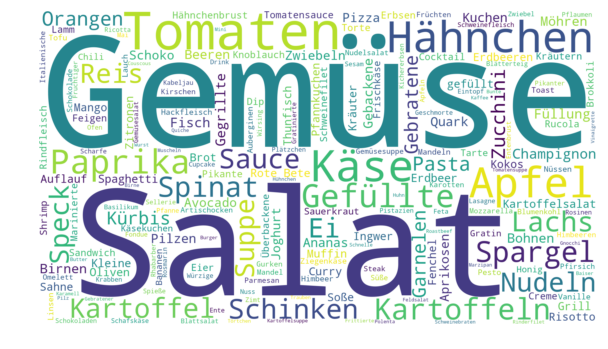

In [90]:
# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color="white", max_font_size=640, width=1920, height=1080).generate(titletext)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
wordcloud.to_file("images/dishes_eatsmarter.png")
plt.show()

#### For ingredients

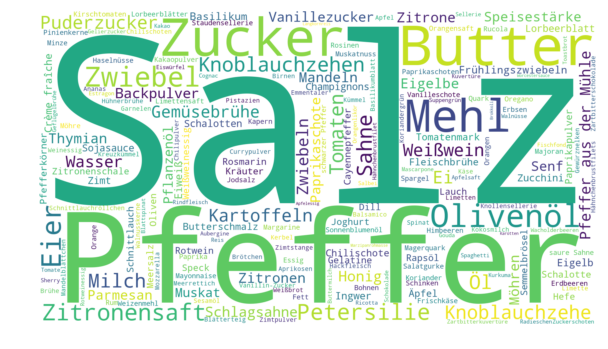

In [91]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", max_font_size=800, width=1920, height=1080).generate_from_frequencies(ingcounter)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
wordcloud.to_file("images/ingredients_eatsmarter.png")
plt.show()

### Conclusion: Explorative Analysis

We have used explorative techniques to understand the user and recipe data more deeply and have found interesting dependencies.
We can use this knowledge to find the best recipes on the platform much more precisely, as we do not only rely on a single metric, but instead can find users that have published good recipes consistently.
Using our scatter matrices we can easily see where to find outliers in the data and some of these outliers will be the users that have performed extraordinarily well.

In comparison to kochbar and chefkoch, this dataset does not provide as much information, but the dataset is quite clean in general. However, there are also many missing values, which make the already scarce metrics less valuable.

Still, we can use the generated features during further analysis with machine learning algorithms.

# 2. Trend Analysis

Due to the lack of publication dates and popularity metrics, the trend analysis of the eatsmarter dataset has not been able to provide any value.
With many values missing in avg_rating, total_votes and comment_number, eatsmarter clearly does not have enough user activity to represent trends on the market.

Thus, for trend analysis, the datasets from chefkoch and kochbar will be used only.

# 3. Data Mining / Machine Learning

The final section of the analysis will present the preparation and application of an exemplary machine learning algorithm on the dataset. Due to the limited frame of this project, only one algorithm can be presented in detail.
For this purpose, the method of clustering has been selected.

Clustering can be useful to find similar data points in a dataset that does not have any class labels beforehand, which makes it an unsupervised learning algorithm. This means that we can use clustering to group the recipes in clusters that contain similar dishes. 

There are many different clustering algorithms that work after different principles and thus are suited of different types of data, depending on the dataset's size, shape and other properties.

## Visualisation with t-SNE

t-SNE is a recently developed and quite popular method for projecting highly dimensional data onto a two- or three-dimensional space for visualisation purposes. This method also helps in distinguishing clusters.
As this is a significant dimensionality reduction, using this process before clustering the data points can aid in reducing computation time greatly.
One feature that is suited very well for t-SNE is the word vector that we have created for the top1 word in each recipe's title. As a visualisation needs to be simple and clear, we will only use a small subset of data in during this process.

In [1]:
import pandas as pd
featuredf = pd.read_csv('exports/featuredf_100_eatsmarter.csv', index_col=0)

In [2]:
import fasttext
model = fasttext.load_model('word_embeddings/prep_model.bin')

In [87]:
# Create a list of the 100 most common words for visualisation:
toplist1 = [w for w in toplist1 if w is not None]
top = Counter(toplist1)
top100_words = []
for word in top.most_common(100):
    top100_words.append(word[0])
    
top100_words[:10]

['Gemüse',
 'Salat',
 'Tomaten',
 'Gefüllte',
 'Hähnchen',
 'Käse',
 'Spargel',
 'Apfel',
 'Nudeln',
 'Kartoffel']

In [88]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

def tsne_plot(model, perplexity):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in top100_words:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=perplexity, n_components=2, init='pca', n_iter=5000, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    Z = []
        
    plt.figure(figsize=(10, 10)) 
    for i in range(len(x)):
        Z.append([x[i], y[i]])
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.savefig('images/eat-tsne.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return Z

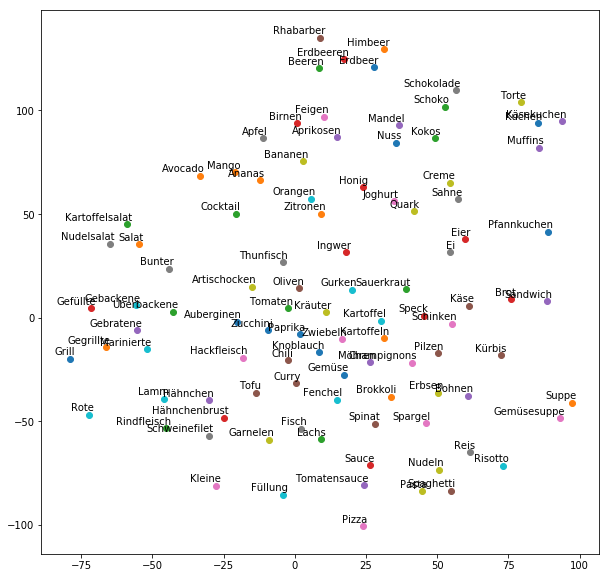

In [96]:
Z1 = tsne_plot(model, 25)

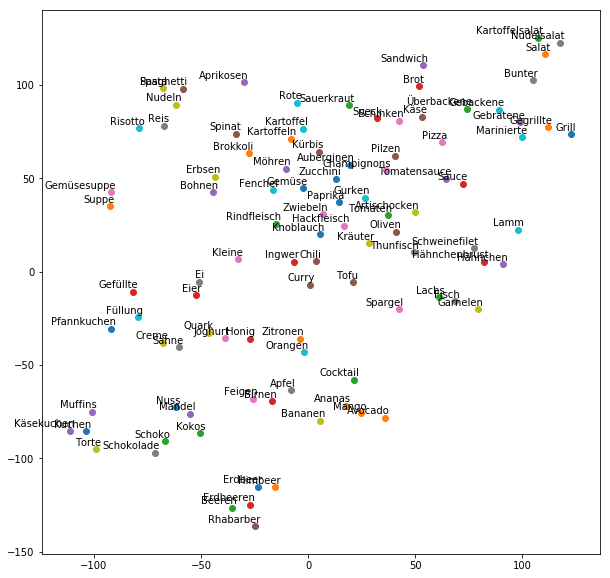

In [89]:
Z2 = tsne_plot(model, 10)

In [90]:
top_vectors = pd.DataFrame(top100_words, columns=['word'])
top_vectors['vectors'] = top_vectors['word'].apply(lookup_vector)
top_vectors.head(10)

,word,vectors
0,Gemüse,"[0.258699506521225, -0.1675672084093094, -0.00..."
1,Salat,"[0.5253750681877136, -0.2820751667022705, -0.4..."
2,Tomaten,"[0.05337012931704521, 0.28184106945991516, 0.3..."
3,Gefüllte,"[-0.11566475033760071, -0.09141931682825089, 0..."
4,Hähnchen,"[-0.25304102897644043, -0.33448708057403564, -..."
5,Käse,"[0.5144494771957397, -0.15242810547351837, -0...."
6,Spargel,"[0.5074779987335205, -0.4225254952907562, 0.35..."
7,Apfel,"[0.06887681037187576, 0.14354068040847778, 0.0..."
8,Nudeln,"[0.4210481643676758, -0.49978044629096985, 0.2..."
9,Kartoffel,"[0.34309911727905273, -0.10766836255788803, 0...."


In [99]:
top_vectors.to_csv('exports/top_vectors_eatsmarter.csv')

The t-SNE visualisation shows how well similar words are placed close to each other. There are many examples for which this has worked very well, for example fruits and dessert, salad, vegetables, spices, noodles and rice, fish or chicken.
There is also something quite interesting in the case of pork meat: while filet and schnitzel are placed close to chicken and fish, ham and bacon lie much closer to cheese, lasagne and vegetables.

This shows that, even in the two-dimensional space, the word embeddings of the most common word in a recipe's title can be used to cluster it with similar recipes. In the 100-dimensional space, such clusterings will probably be even more accurate.

### Clustering with DBSCAN

As we have seen in the t-SNE visualisation, points with similar words are more dense. However, they are not all placed in globular shape, but can instead form a line or a circle. Thus, we need to choose a clustering algorithm that is density-based. DBSCAN is a common density-based clustering algorithm.

For simplicity and comparability, we will perform a clustering on the vectors that were created by t-SNE, so the formed clusters can directly be compared with the respective plot from above.

In [92]:
labels = []
tokens = []

for word in top100_words:
    tokens.append(model[word])
    labels.append(word)
    
tokens = np.array(tokens)
#Z1 = np.array(Z1)
Z2 = np.array(Z2)

In [93]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

X = Z2

# Compute DBSCAN
db = DBSCAN(eps=15, min_samples=3).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

print(labels)

[ 0  1  2 13 14  5 -1 10  3  4  2  4  8 -1 -1 -1  5  3  3 -1  2 -1 -1  5  6
  4  7  8  8  4  9  6  9 10  0  3 -1 -1  7  6 11 12  1 -1 -1  2 -1  2  2  3
  6 12 15  9 11 -1  2 -1 -1 13 13 12 12 14 -1  2 -1 -1 11 -1  2  9 -1 -1 11
  2 -1 14 12  0  2 -1  5  2 15 -1  2  1 -1  2 15 -1  6  7 -1  9 10 -1  2  6]


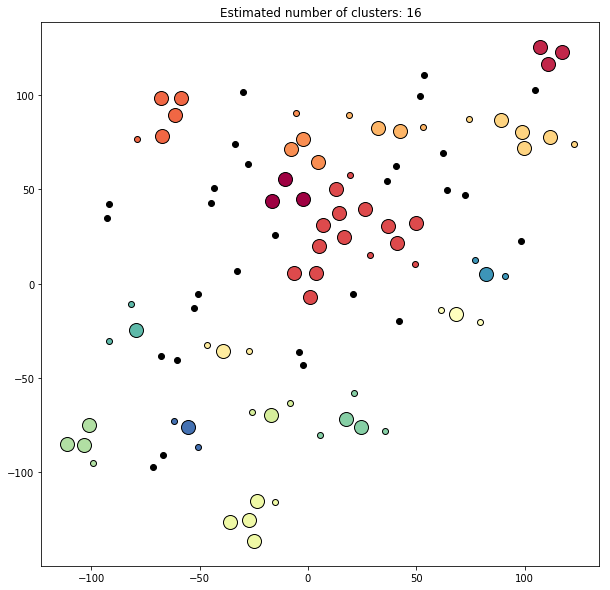

In [94]:
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(10,10))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.savefig('images/eat-clusters.png', dpi=300, bbox_inches='tight')
plt.show()

In [103]:
# Merge the class labels with the dataset:
top_vectors['label'] = labels
top_vectors = top_vectors.sort_values(by='label')

In [104]:
top_vectors.query('label > 5 and label < 12')

,word,vectors,label
50,Grill,"[0.32740944623947144, -0.18862852454185486, -0...",6
92,Überbackene,"[0.7922259569168091, -0.27096590399742126, -0....",6
24,Gebratene,"[0.3798849582672119, -0.2982615828514099, -0.0...",6
31,Gegrillte,"[0.11414223164319992, -0.1364314705133438, -0....",6
99,Marinierte,"[0.15196378529071808, -0.2618352174758911, -0....",6
39,Gebackene,"[0.20574168860912323, 0.0817156583070755, -0.0...",6
93,Honig,"[0.06952785700559616, -0.1627495437860489, -0....",7
26,Joghurt,"[0.29092147946357727, 0.0031468868255615234, -...",7
38,Quark,"[0.39774826169013977, 0.05041850358247757, -0....",7
28,Garnelen,"[0.3389413058757782, 0.009764561429619789, 0.3...",8


We can see that these words have been labelled incredibly well, e.g. with one label for cakes (11) or one for fish (8).

### Summary Data Mining

We have seen how the data can be transformed by dimensionality reduction to create two-dimensional presentations that can be plotted well. Additionally, the results from clustering with DBSCAN have shown that even the data with reduced dimensions can be clustered very accurately into recipe categories.

For an alternative approach to clustering, the ingredients could be used as well. By increasing the dimensionality of the dataset before applying t-SNE (i.e. one-hot encoding with 1,000 ingredients or more, for example), the representation would probably reach a higher accuracy. However, as this is an unsupervised learning problem, we cannot perform an automatic accuracy testing, but we can see by looking at the results that the chosen algorithms have worked very well.

When applying these techniques to categorise all recipes in the dataset, it will be better to use more than just the 100 most frequent words, of course. Then, the t-SNE visualisation will most probably not be readable anymore, but the results from clustering can then be applied to many different recipes and work very well.